# Importing Libraries and Dataset Collection

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [73]:
df = pd.read_csv("Car_Price_Prediction.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Data Preprocessing

In [74]:
df.size

105664

In [75]:
# checking the rows and columns
df.shape

(8128, 13)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [77]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [78]:
# checking for null values.
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [79]:
# dropping the null values beacuse they are less in number compared to the whole dataset
df.dropna(inplace = True)

In [80]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [81]:
df.shape

(7906, 13)

In [82]:
# checking for duplicates
df.duplicated().sum()

1189

In [83]:
for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

name: 1982
year: 27
selling_price: 670
km_driven: 898
fuel: 4
seller_type: 3
transmission: 2
owner: 5
mileage: 393
engine: 121
max_power: 320
torque: 441
seats: 9


In [84]:
# dropping duplicates
df.drop_duplicates(inplace = True)

In [85]:
df.duplicated().sum()

0

In [86]:
df.shape

(6717, 13)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


# Data Analysis

In [88]:
for i in df.columns:
    print(f"Unique values of {i}")
    print(f"{df[i].unique()}")
    print(f"=====================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

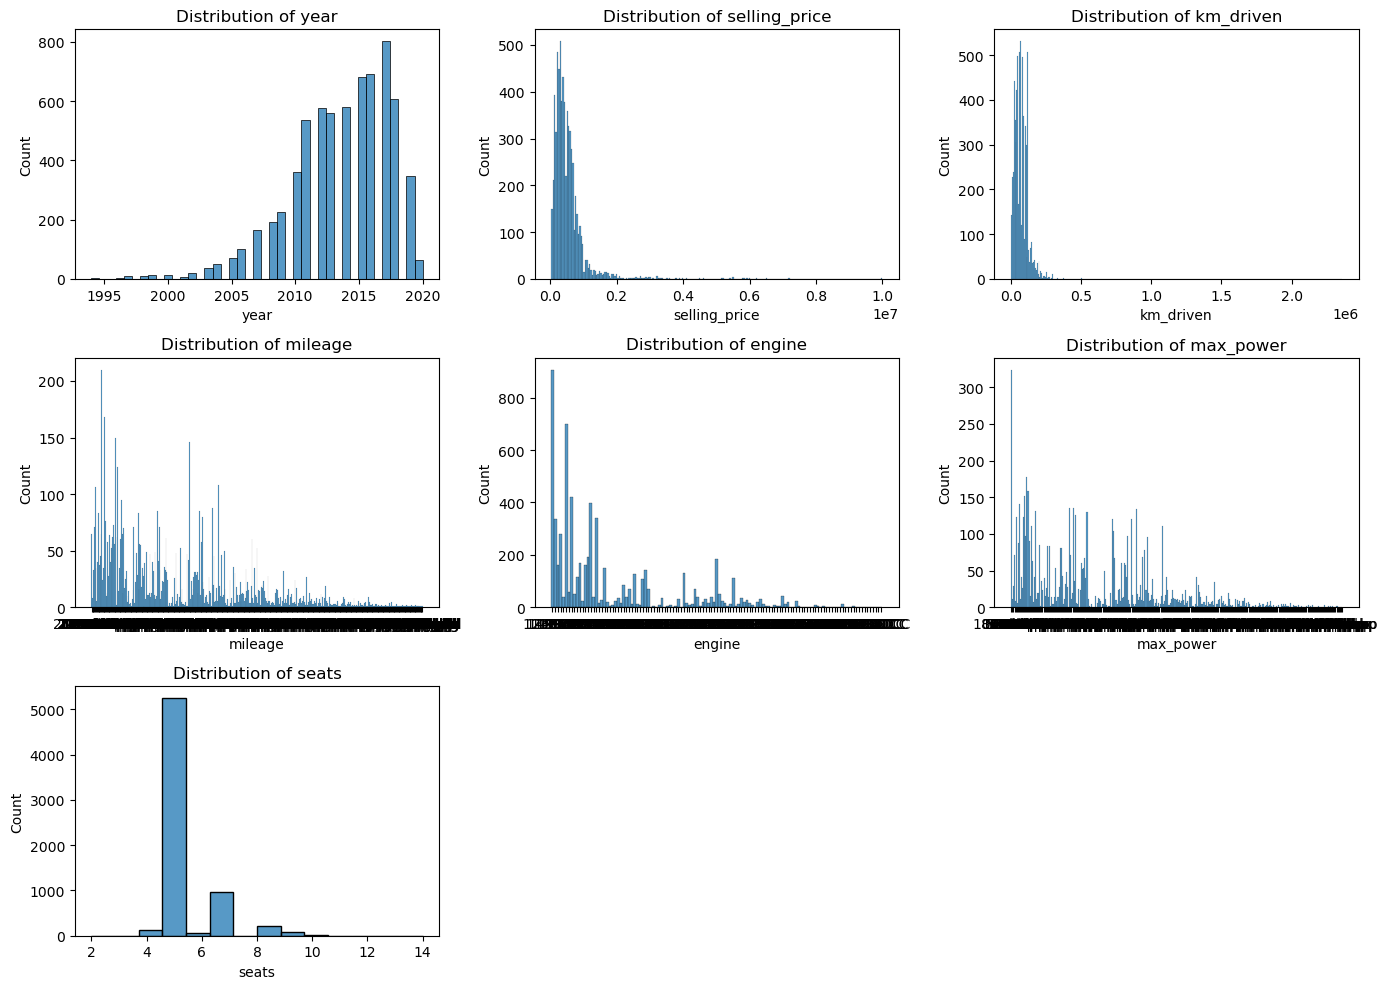

In [89]:
# Distribution of numerical features
numerical_features = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

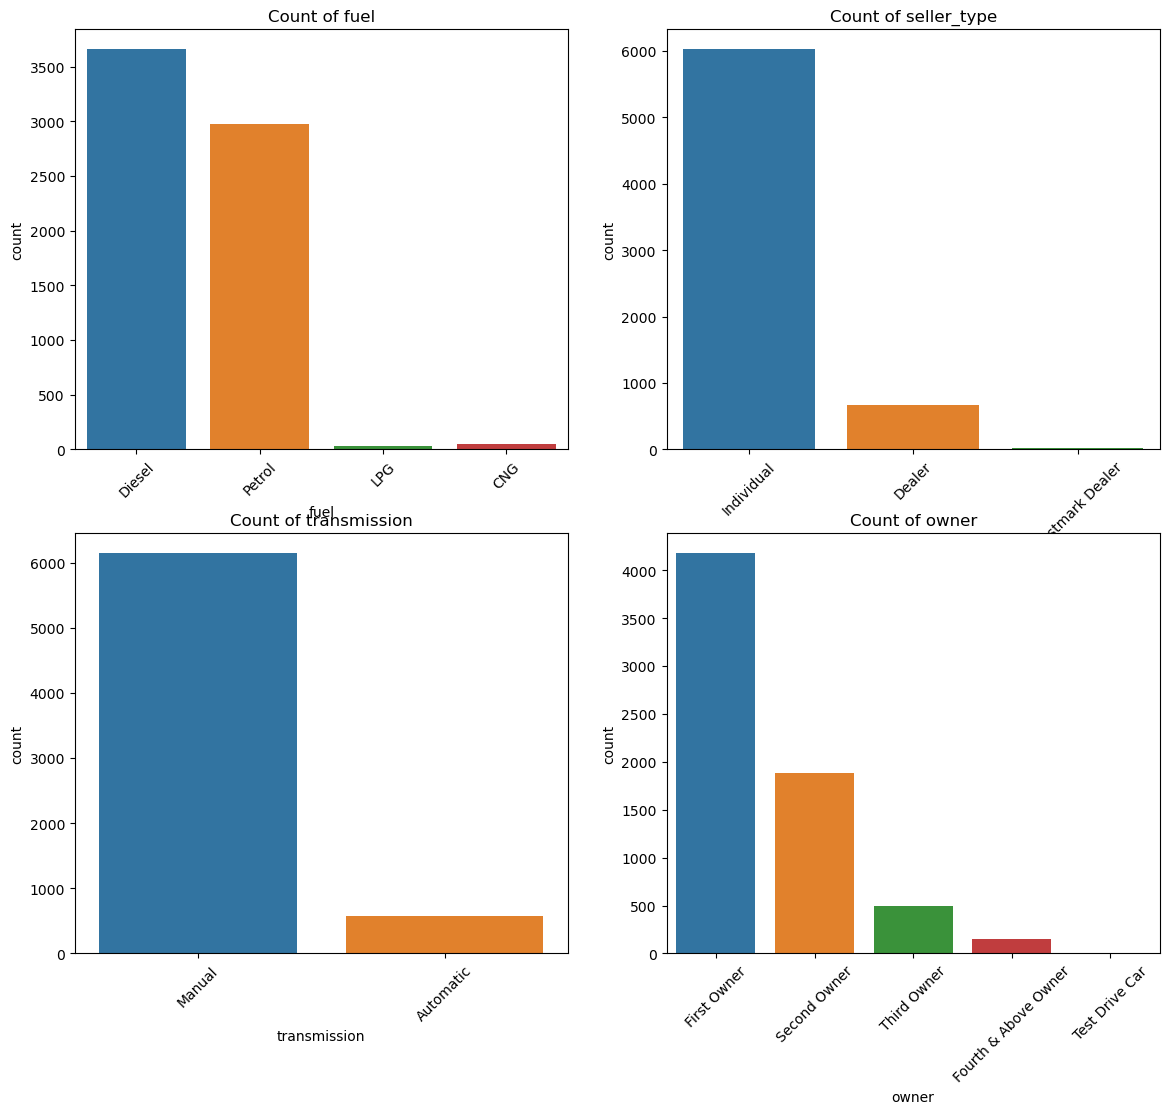

In [90]:
# Bar chart for Categorical Feature
category = ['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(14, 12))
for i, feature in enumerate(category, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature)
    plt.title(f"Count of {feature}")
    plt.xticks(rotation = 45)
plt.show()    

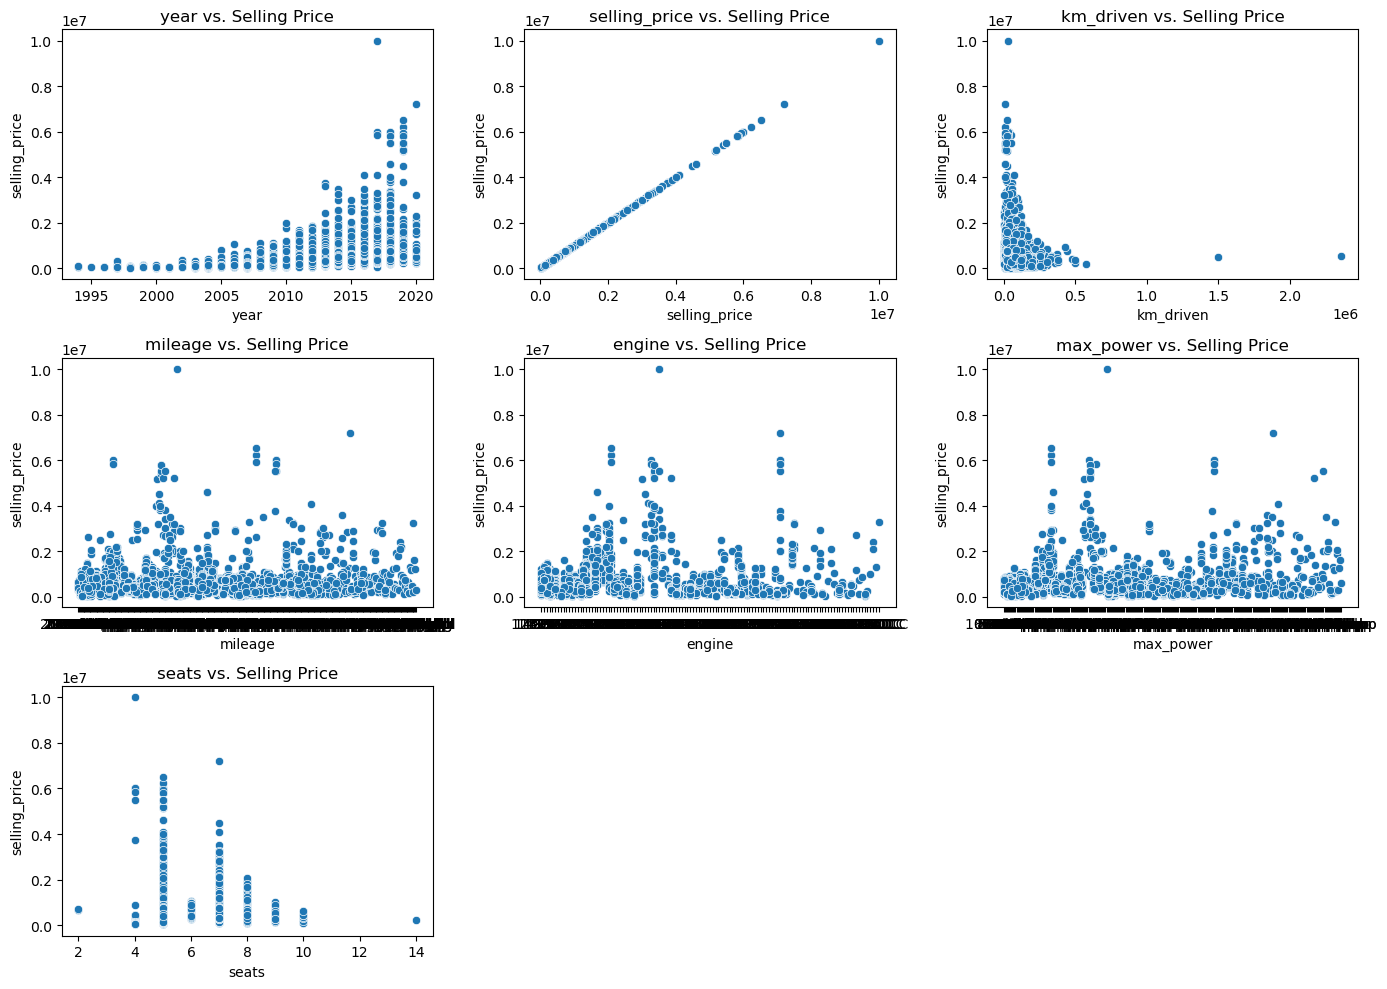

In [91]:
# Scatter plot for numerical features against selling price
numerical_features = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=feature, y = 'selling_price')
    plt.title(f"{feature} vs. Selling Price")
plt.tight_layout()
plt.show()

# Feature Engineering

In [92]:
# Regular expressions (regex or regexp) are sequences of characters that define a search pattern. 
# They are commonly used for string manipulation tasks such as searching for patterns within text, string parsing, and text validation.
import re
# Function to extract numerical values of torque
def extract_torque(torque):
    # Regular expression to extract numerical values
    pattern = r'(\d+\.?\d*)'
    matches = re.findall(pattern, str(torque))
    if matches:
        return float(matches[0])
    else:
        return pd.Na

# Apply the function to the 'torque' column
df['torque_num'] = df['torque'].apply(extract_torque)
df['torque_num'].head()

0    190.0
1    250.0
2     12.7
3     22.4
4     11.5
Name: torque_num, dtype: float64

In [93]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_num
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,22.4
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,11.5


In [94]:
# Dropping the torque column
df.drop('torque', axis = 1, inplace = True)

In [95]:
df.sample(n=3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
4136,Hyundai Creta 1.6 SX Option Executive,2018,1405000,15000,Petrol,Individual,Manual,First Owner,15.8 kmpl,1591 CC,121.3 bhp,5.0,151.0
7916,Hyundai i20 Asta 1.4 CRDi,2014,600000,100000,Diesel,Individual,Manual,Fourth & Above Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0,219.7
6760,Datsun GO Plus T BSIV,2016,325000,70000,Petrol,Individual,Manual,Second Owner,19.44 kmpl,1198 CC,67 bhp,7.0,104.0


In [96]:
# Function to extract the car name(brand name)
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip(' ')

In [97]:
get_brand_name('Mahindra XUV500 AT W10 FWD')

'Mahindra'

In [98]:
df['name'] = df['name'].apply(get_brand_name)
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [99]:
# Using the same function to extract the mileage integer
df['mileage'] = df['mileage'].apply(get_brand_name)
df['mileage'].head(3)

0     23.4
1    21.14
2     17.7
Name: mileage, dtype: object

In [100]:
# Using the same function to extract the engine
df['engine'] = df['engine'].apply(get_brand_name)
df['engine'].sample(n=3)

7524    1998
6153     796
2395    1493
Name: engine, dtype: object

In [101]:
# # Using the same function to extract the maximum power
df['max_power'] = df['max_power'].apply(get_brand_name)
df['max_power'].sample(n=3)

4307       63
88      68.05
2446     47.3
Name: max_power, dtype: object

In [102]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,190.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,12.7
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,22.4
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,11.5


In [103]:
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

# Encoding

In [104]:
name = {
    'Maruti' : 1,
    "Skoda" : 2,
    "Honda" : 3,
    "Hyundai" : 4,
    'Toyota' : 5,
    'Ford' : 6,
    'Renault': 7,
    'Mahindra': 8,
    "Tata" : 9,
    'Chevrolet' : 10,
    'Datsun' : 11,
    'Jeep' : 12,
    'Mercedes-Benz' : 13,
    'Mitsubishi' : 14,
    'Audi' : 15,
    'Volkswagen' : 16,
    'BMW' : 17,
    'Nissan' : 18,
    'Lexus' : 19,
    'Jaguar': 20,
    'Land' : 21,
    'MG' : 22,
    'Volvo' : 23,
    'Daewoo' : 24,
    'Kia' : 25,
    'Fiat' : 26,
    'Force': 27,
    'Ambassador' : 28,
    'Ashok' : 29,
    'Isuzu' : 30,
    'Opel' : 31,
}
df['name'] = df['name'].map(name)

In [105]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
0,1,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,190.0
1,2,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.0
2,3,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,12.7


In [106]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [107]:
fuel = {
    "Diesel" : 1,
    "Petrol" : 2, 
    "LPG" : 3,
    "CNG" : 4,
}
df['fuel'] = df['fuel'].map(fuel)

In [108]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
0,1,2014,450000,145500,1,Individual,Manual,First Owner,23.4,1248,74,5.0,190.0
1,2,2014,370000,120000,1,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.0
2,3,2006,158000,140000,2,Individual,Manual,Third Owner,17.7,1497,78,5.0,12.7


In [109]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [110]:
trans = {
    "Manual" : 1,
    "Automatic" : 2
}
df['transmission'] = df['transmission'].map(trans)

In [111]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
0,1,2014,450000,145500,1,Individual,1,First Owner,23.4,1248,74,5.0,190.0
1,2,2014,370000,120000,1,Individual,1,Second Owner,21.14,1498,103.52,5.0,250.0
2,3,2006,158000,140000,2,Individual,1,Third Owner,17.7,1497,78,5.0,12.7


In [112]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [113]:
seller = {
    "Individual" : 1,
    "Dealer" : 2,
    "Trustmark Dealer" : 3
}
df['seller_type'] = df['seller_type'].map(seller)

In [114]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
0,1,2014,450000,145500,1,1,1,First Owner,23.4,1248,74,5.0,190.0
1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498,103.52,5.0,250.0
2,3,2006,158000,140000,2,1,1,Third Owner,17.7,1497,78,5.0,12.7


In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['owner'] = le.fit_transform(df['owner'])
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
0,1,2014,450000,145500,1,1,1,0,23.4,1248,74,5.0,190.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498,103.52,5.0,250.0
2,3,2006,158000,140000,2,1,1,4,17.7,1497,78,5.0,12.7


In [48]:
# checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   int64  
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   int64  
 5   seller_type    6717 non-null   int64  
 6   transmission   6717 non-null   int64  
 7   owner          6717 non-null   int64  
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  seats          6717 non-null   float64
 12  torque_num     6717 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 734.7+ KB


In [49]:
# changing the data type
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   int64  
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   int64  
 5   seller_type    6717 non-null   int64  
 6   transmission   6717 non-null   int64  
 7   owner          6717 non-null   int64  
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
 12  torque_num     6717 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 734.7 KB


In [51]:
# resetting the index
df.reset_index(inplace = True)
df

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
0,0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,190.0
1,1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,250.0
2,2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,12.7
3,3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,22.4
4,4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,8121,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0,90.0
6713,8122,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0,219.7
6714,8123,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0,113.7
6715,8124,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0,24.0


In [52]:
# Dropping the index column
df.drop("index", axis = 1, inplace = True)

In [53]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,190.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,250.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,12.7
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,22.4
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0,90.0
6713,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0,219.7
6714,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0,113.7
6715,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0,24.0


In [54]:
df.describe()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
count,6717.000000,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000
mean,5.350007,2013.611136,5.263860e+05,7.339834e+04,1.475808,1.107191,1.085604,1.500074,19.466585,1430.985857,87.766100,5.434271,160.854853
std,4.611373,3.897402,5.235504e+05,5.870328e+04,0.552664,0.322111,0.279799,0.737740,4.048102,493.469198,31.724555,0.983805,91.630280
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,624.000000,32.800000,2.000000,4.800000
25%,1.000000,2011.000000,2.500000e+05,3.800000e+04,1.000000,1.000000,1.000000,1.000000,16.800000,1197.000000,67.100000,5.000000,96.000000
50%,4.000000,2014.000000,4.200000e+05,6.820300e+04,1.000000,1.000000,1.000000,1.000000,19.440000,1248.000000,81.830000,5.000000,146.000000
75%,8.000000,2017.000000,6.500000e+05,1.000000e+05,2.000000,1.000000,1.000000,2.000000,22.500000,1498.000000,100.000000,5.000000,200.000000
max,31.000000,2020.000000,1.000000e+07,2.360457e+06,4.000000,3.000000,2.000000,5.000000,42.000000,3604.000000,400.000000,14.000000,789.000000


In [55]:
df.corr()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
name,1.000000,0.033978,0.251613,0.049784,-0.277496,0.047916,0.174458,-0.013379,-0.273961,0.369460,0.348463,0.155834,0.353764
year,0.033978,1.000000,0.427335,-0.387918,-0.043564,0.148137,0.143997,-0.480096,0.366048,-0.019763,0.159889,0.025021,0.262972
selling_price,0.251613,0.427335,1.000000,-0.161265,-0.245558,0.250423,0.465538,-0.209265,-0.108655,0.442772,0.692323,0.158531,0.616919
km_driven,0.049784,-0.387918,-0.161265,1.000000,-0.252491,-0.126336,-0.118965,0.252205,-0.196419,0.253460,0.041770,0.207890,0.048914
fuel,-0.277496,-0.043564,-0.245558,-0.252491,1.000000,-0.019724,0.005210,-0.012138,-0.035961,-0.510633,-0.328039,-0.343668,-0.592204
seller_type,0.047916,0.148137,0.250423,-0.126336,-0.019724,1.000000,0.213725,-0.151667,0.001552,0.065629,0.187339,-0.040726,0.135759
transmission,0.174458,0.143997,0.465538,-0.118965,0.005210,0.213725,1.000000,-0.076854,-0.173667,0.219526,0.441681,-0.019314,0.294625
owner,-0.013379,-0.480096,-0.209265,0.252205,-0.012138,-0.151667,-0.076854,1.000000,-0.188624,0.033741,-0.052018,0.007649,-0.112761
mileage,-0.273961,0.366048,-0.108655,-0.196419,-0.035961,0.001552,-0.173667,-0.188624,1.000000,-0.579153,-0.378609,-0.459188,-0.132661
engine,0.369460,-0.019763,0.442772,0.253460,-0.510633,0.065629,0.219526,0.033741,-0.579153,1.000000,0.683506,0.658711,0.611627


Text(0.5, 1.0, 'Correlation Heatmap')

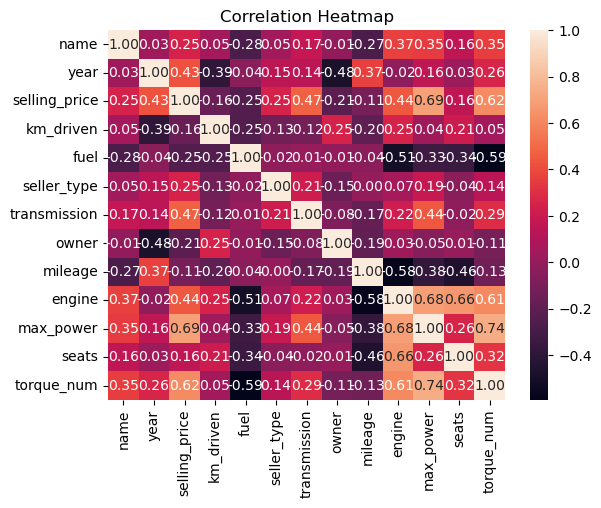

In [56]:
# Checking for correlation
sns.heatmap(df.corr(), fmt = '.2f', annot = True)
plt.title("Correlation Heatmap")

# Separating the feature and target variable

In [57]:
x = df.drop("selling_price", axis = 1)
y = df['selling_price']

In [58]:
x.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
0,1,2014,145500,1,1,1,1,23.40,1248.0,74.00,5.0,190.0
1,2,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,250.0


# Splitting the dataset

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, shuffle = True, random_state = 42)

In [60]:
print(f"The shape of our x_train is {x_train.shape}")
print(f"The shape of our x_test is {x_test.shape}")
print(f"The shape of our y_train is {y_train.shape}")
print(f"The shape of our y_test is {y_test.shape}")

The shape of our x_train is (4701, 12)
The shape of our x_test is (2016, 12)
The shape of our y_train is (4701,)
The shape of our y_test is (2016,)


# Model Training and Hyperparameter Tuning

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the gradient boosting model
gbr = GradientBoostingRegressor(n_estimators=1000)

# Train the model
gbr.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

In [62]:
print(round(gbr.score(x_train, y_train)* 100, 2))

98.47


In [63]:
modl = gbr.predict(x_test)
modl

array([1080723.68199553,  829811.73277492,  246029.94057111, ...,
        778907.98559439,  262680.08449993,  691867.01198169])

# Evaluation

In [64]:
from sklearn.metrics import r2_score, max_error
r2_score_rf = r2_score(y_test, modl)
r2_score_rf

0.9205526633331051

In [65]:
max_err = max_error(y_test, modl)
max_err

1318624.1303313822

# Prediction

In [66]:
x_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
6587,1,2013,90000,2,1,1,1,16.02,1373.0,93.70,7.0,130.00
1319,4,2007,100000,2,1,1,2,19.81,1086.0,68.05,5.0,99.04
3571,9,2016,35000,1,1,1,2,27.28,1047.0,69.00,5.0,140.00
6563,4,2013,80000,1,2,1,1,25.00,1493.0,113.42,5.0,250.06
6138,4,2013,144000,1,1,1,1,21.90,1396.0,88.80,5.0,219.70


In [67]:
data_model = pd.DataFrame(
    [[4, 2007, 100000, 2, 1, 1, 2, 19.81, 1086.0, 68.05, 5.0, 99.04]],
    columns = ['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power','seats', 'torque_num']
)
data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_num
0,4,2007,100000,2,1,1,2,19.81,1086.0,68.05,5.0,99.04


In [68]:
gbr.predict(data_model)

array([139946.63782552])

In [71]:
import pickle as pk
pk.dump(gbr, open('gbr.pkl', 'wb'))